In [44]:
import pandas as pd
import numpy as np
import time
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [2]:
fields = pd.read_csv('NSL_KDD-master/Field Names.csv',header=None)[0]
KDD = pd.read_csv('NSL_KDD-master/20 Percent Training Set.csv', header=None)
KDD.columns = fields
KDD

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


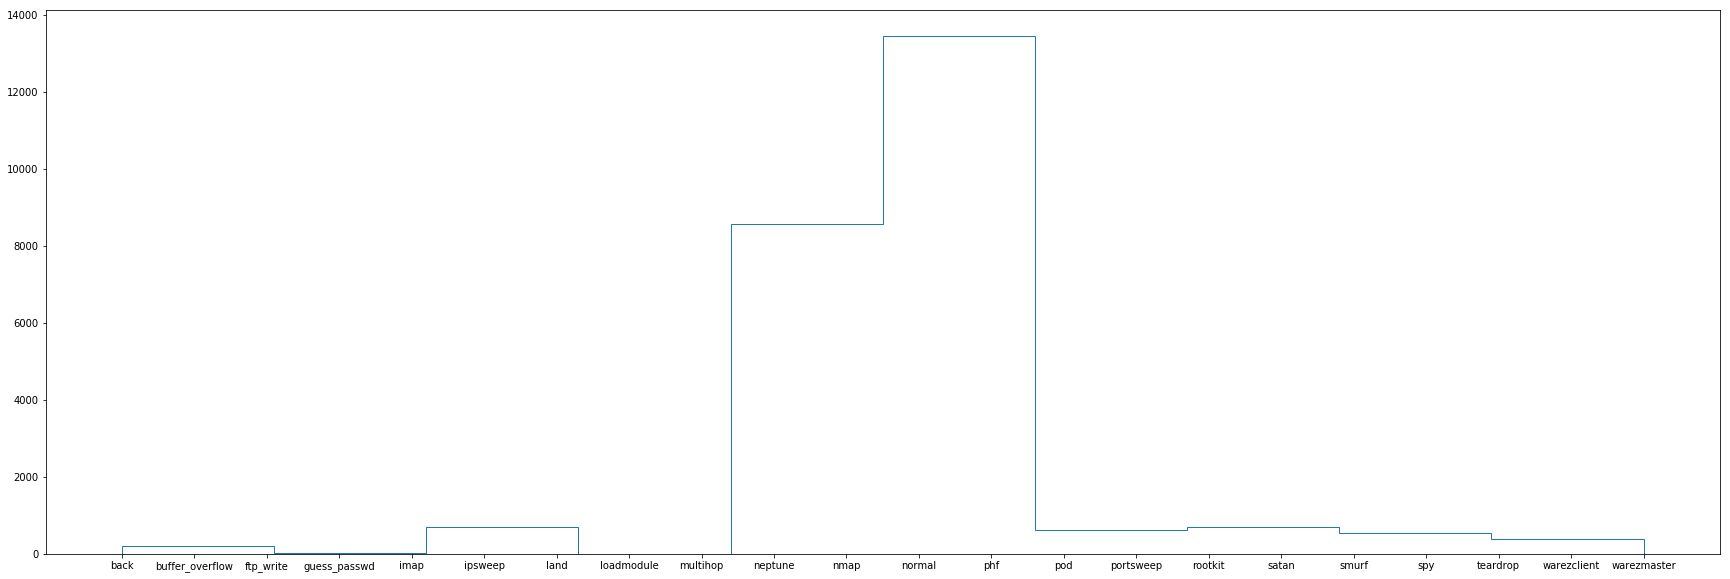

In [3]:
plt.figure(figsize=(30,10))
plt.hist(KDD['attack_type'], histtype='step')
plt.show()

In [4]:
KDD_clean = KDD
KDD_clean.protocol_type = pd.Categorical(pd.factorize(KDD.protocol_type)[0])
KDD_clean.service = pd.Categorical(pd.factorize(KDD.service)[0])
KDD_clean.flag = pd.Categorical(pd.factorize(KDD.flag)[0])
KDD_clean.attack_type = pd.Categorical(pd.factorize(KDD.attack_type)[0])

data = KDD_clean
KDD_clean.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty
0,0,0,0,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,1,1,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,0,2,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,0,3,0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,0,3,0,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21


In [5]:
from sklearn.model_selection import train_test_split

data.dropna(inplace=True)
X, y = data.iloc[:, 0:-1].values, data.iloc[:, -1].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)   

In [6]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

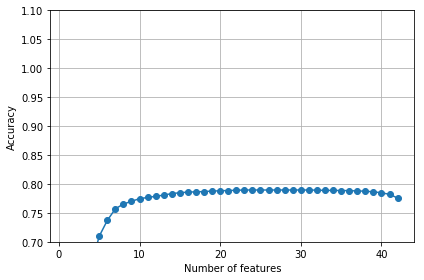

In [9]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()

plt.show()

In [68]:
k5 = list(sbs.subsets_[-20])
print(data.columns[1:][k5])

Index(['protocol_type', 'service', 'flag', 'dst_bytes', 'num_failed_logins',
       'logged_in', 'num_compromised', 'su_attempted', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'srv_rerror_rate',
       'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object', name=0)


In [11]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.9073380968583419
Test accuracy: 0.7827467584016936


In [12]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.9030849495293184
Test accuracy: 0.7798359354326542


In [13]:
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)

In [14]:
biased_rating = X_train_std[:, k5]
biased_rating

array([[-0.71725004, -0.08883394, -0.80510336, ..., -1.02971333,
        -0.6291217 ,  0.21035064],
       [-0.09655467, -0.08883394, -0.80510336, ..., -0.62275521,
         1.60937241, -0.38154688],
       [-0.25172851, -0.08883394, -0.80510336, ...,  0.55290158,
        -0.6291217 , -0.38154688],
       ...,
       [ 0.5241407 , -0.08883394, -0.80510336, ..., -0.95736522,
         1.60937241, -0.38154688],
       [ 0.36896686, -0.08883394,  1.24207655, ...,  0.54385807,
        -0.6291217 , -0.38154688],
       [-0.56207619, -0.08883394,  1.24207655, ...,  1.26733917,
        -0.6291217 , -0.38154688]])

In [28]:
from sklearn.linear_model import Perceptron

X_train = np.array(KDD.loc[:,:'dst_host_srv_rerror_rate'])
y_train = np.array(KDD['attack_type'])
p_clf = Perceptron(verbose=10)
p_clf.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s 

-- Epoch 1
Norm: 4255402.06, NNZs: 38, Bias: 948.000000, T: 25192, Avg. loss: 7673934506.513873
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2207328.43, NNZs: 38, Bias: 1074.000000, T: 50384, Avg. loss: 8385700084.604066
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 286909947.28, NNZs: 39, Bias: 5212.000000, T: 75576, Avg. loss: 1268343514659.714844
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 133924940.76, NNZs: 39, Bias: 10652.000000, T: 100768, Avg. loss: 1288079288534.101074
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 6571435.00, NNZs: 39, Bias: 13062.000000, T: 125960, Avg. loss: 365720350419.284119
Total training time: 0.02 seconds.
-- Epoch 1
Norm: 7179.69, NNZs: 29, Bias: -186.000000, T: 25192, Avg. loss: 3547.825563
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 8720.46, NNZs: 29, Bias: -330.000000, T: 50384, Avg. loss: 3250.227200
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 10103.82, NNZs: 29, Bias: -459.000000, T: 75576, Avg. loss: 29

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=10, warm_start=False)

In [29]:
KDD_train = pd.read_csv('NSL_KDD-master/KDDTrain+_20Percent.txt', header=None)
KDD_train.columns = fields
KDD_train.protocol_type = pd.Categorical(pd.factorize(KDD_train.protocol_type)[0])
KDD_train.service = pd.Categorical(pd.factorize(KDD_train.service)[0])
KDD_train.flag = pd.Categorical(pd.factorize(KDD_train.flag)[0])
KDD_train.attack_type = pd.Categorical(pd.factorize(KDD_train.attack_type)[0])
KDD_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty
0,0,0,0,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,1,1,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,0,2,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,0,3,0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,0,3,0,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21


In [30]:
X_test = np.array(KDD_train.loc[:,:'dst_host_srv_rerror_rate'])
y_test = np.array(KDD_train['attack_type'])
y_pred = p_clf.predict(X_test)
p_clf.score(X_test,y_test)

0.21935535090504923

In [31]:
precision_score(y_test,y_pred,average=None)

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.13294682, 0.95516413, 0.        , 0.        , 0.00735358,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00146456, 0.        , 0.        ,
       0.        , 0.        ])

In [32]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
mlp_clf.score(X_test, y_test)

0.8998094633216894

In [33]:
precision_score(y_test,y_pred,average=None)

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.96570187, 0.94443161, 0.26839827, 0.8358459 , 0.27536232,
       0.99404762, 0.39509537, 0.88290398, 0.91449814, 0.        ,
       0.00938967, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [34]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
y_pred = gnb_clf.predict(X_test)
gnb_clf.score(X_test, y_test)

0.4637980311209908

In [35]:
precision_score(y_test,y_pred,average=None)

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.98780488, 0.68547449, 0.05952381, 0.        , 0.5059952 ,
       0.        , 0.11820652, 0.00294638, 0.68841545, 0.08275862,
       1.        , 0.24390244, 0.33333333, 0.        , 0.00367647,
       0.00754717, 0.07692308, 0.45454545, 0.04347826, 0.        ,
       1.        , 1.        ])

In [45]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier()

start = time.time()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print("Score ->",dt_clf.score(X_test, y_test))
end = time.time()
print("Time for execution->",end-start)

Score -> 0.9999603048586853
Time for execution-> 0.18255853652954102


In [37]:
precision_score(y_test,y_pred,average=None)

array([0.99992565, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier()

start = time.time()
rfc_clf.fit(X_train, y_train)
y_pred = rfc_clf.predict(X_test)
print("Score ->",rfc_clf.score(X_test, y_test))
end = time.time()
print("Time for execution->",end-start)

Score -> 0.9998015242934265
Time for execution-> 0.2976531982421875


In [52]:
precision_score(y_test,y_pred,average=None)

array([0.99962836, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [69]:
sbs_data = data.iloc[:,k5]
sbs_data.head()

,duration,protocol_type,service,src_bytes,hot,num_failed_logins,logged_in,root_shell,count,srv_count,serror_rate,rerror_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,0,0,0,491,0,0,0,0,2,2,0.0,0.0,0.00,150,25,0.17,0.17,0.00,0.00,0.05
1,0,1,1,146,0,0,0,0,13,1,0.0,0.0,0.15,255,1,0.00,0.88,0.00,0.00,0.00
2,0,0,2,0,0,0,0,0,123,6,1.0,0.0,0.07,255,26,0.10,0.00,1.00,1.00,0.00
3,0,0,3,232,0,0,1,0,5,5,0.2,0.0,0.00,30,255,1.00,0.03,0.03,0.01,0.00
4,0,0,3,199,0,0,1,0,30,32,0.0,0.0,0.00,255,255,1.00,0.00,0.00,0.00,0.00


In [70]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)   

In [71]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [72]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier()

start = time.time()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print("Score ->",dt_clf.score(X_test, y_test))
end = time.time()
print("Time for execution->",end-start)

Score -> 0.8139719502513892
Time for execution-> 0.17081093788146973


In [73]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier()

start = time.time()
rfc_clf.fit(X_train, y_train)
y_pred = rfc_clf.predict(X_test)
print("Score ->",rfc_clf.score(X_test, y_test))
end = time.time()
print("Time for execution->",end-start)

Score -> 0.8180735644350358
Time for execution-> 0.27034950256347656
